In [25]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.arima_process import ArmaProcess
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.tsa.stattools import adfuller
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

In [26]:
df = pd.read_csv('../data/data/data_daily.csv', index_col=0, parse_dates=True)
df = df.resample('D').mean()
df.head()

,Adj Close,Close,High,Low,Open,Volume
Datetime,,,,,,
2007-09-17 00:00:00+00:00,4494.649902,4494.649902,4549.049805,4482.850098,4518.450195,0.0
2007-09-18 00:00:00+00:00,4546.200195,4546.200195,4551.799805,4481.549805,4494.100098,0.0
2007-09-19 00:00:00+00:00,4732.350098,4732.350098,4739.000000,4550.250000,4550.250000,0.0
2007-09-20 00:00:00+00:00,4747.549805,4747.549805,4760.850098,4721.149902,4734.850098,0.0
2007-09-21 00:00:00+00:00,4837.549805,4837.549805,4855.700195,4733.700195,4752.950195,0.0


In [27]:
df = pd.DataFrame(df['Close'], index=df.index)

In [28]:
df.head()

,Close
Datetime,
2007-09-17 00:00:00+00:00,4494.649902
2007-09-18 00:00:00+00:00,4546.200195
2007-09-19 00:00:00+00:00,4732.350098
2007-09-20 00:00:00+00:00,4747.549805
2007-09-21 00:00:00+00:00,4837.549805


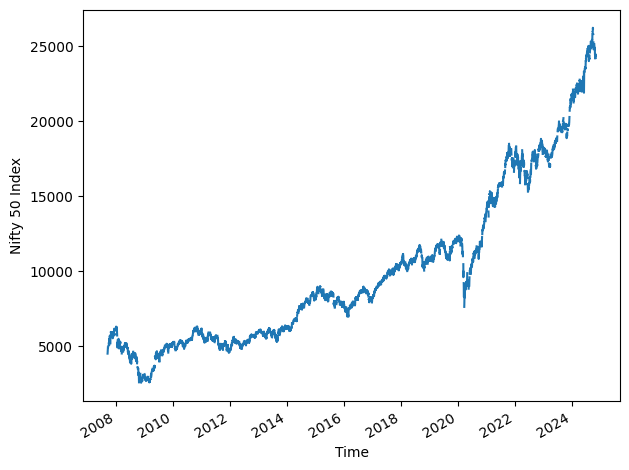

In [29]:
fig, ax = plt.subplots()

ax.plot(df['Close'], label='Close')
ax.set_xlabel('Time')
ax.set_ylabel('Nifty 50 Index')

# plt.xticks(
#     [0, 30, 57, 87, 116, 145, 175, 204, 234, 264, 293, 323, 352, 382, 409, 439, 468, 498], 
#     ['Jan 2019', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec', 'Jan 2020', 'Feb', 'Mar', 'Apr', 'May', 'Jun'])

fig.autofmt_xdate()
plt.tight_layout()

plt.savefig('figures/daily_nifty.png', dpi=300)

In [30]:
df.dropna(inplace=True)

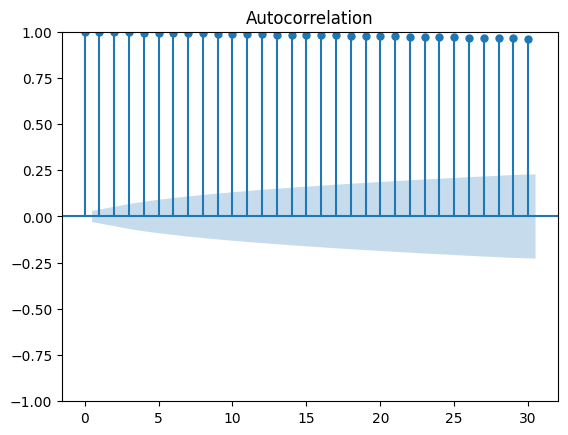

In [31]:
plot_acf( df['Close'], lags=30);


In [32]:
ADF_result = adfuller(df['Close'])

print(f'ADF Statistic: {ADF_result[0]}')
print(f'p-value: {ADF_result[1]}')

ADF Statistic: 1.6973459526644847
p-value: 0.9981221229514049


* P-Values Shows that the Data is not Statinory we make it statinory by differencing 

In [43]:
Close_diff  = np.diff(df['Close'], n=1)
Close_log = np.log(df['Close'])
Close_log_diff = np.diff(Close_log, n=1)

In [45]:
adf_close_log = adfuller(Close_log)
adf_close = adfuller(Close_diff)
adf_close_log_diff = adfuller(Close_log_diff)

print(f'ADF Statistic:- adf_close = {adf_close[0]}, adf_close_log = {adf_close_log[0]}, adf_close_log_diff = {adf_close_log_diff[0]}')
print(f'p-value:- adf_close = {adf_close[1]}, adf_close_log = {adf_close_log[1]}, adf_close_log_diff = {adf_close_log_diff[1]}')


ADF Statistic:- adf_close = -11.9661046391134, adf_close_log = -0.09790194006825483, adf_close_log_diff = -14.20281240169334
p-value:- adf_close = 3.9971655014068153e-22, adf_close_log = 0.9496471078322979, adf_close_log_diff = 1.7757140167274314e-26


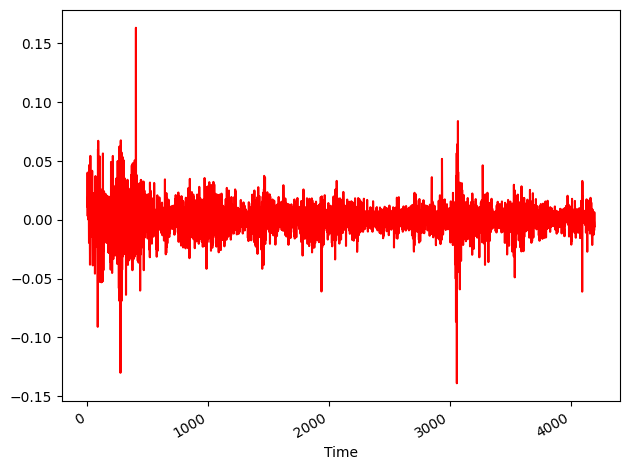

In [46]:
fig, ax = plt.subplots()

ax.plot(Close_log_diff, label='Close', color='red')
ax.set_xlabel('Time')

# ax.set_xlabel('Time')
# ax.set_ylabel('Widget sales - diff (k$)')
#  set xticks to df.index
# plt.xticks(df.index)
# plt.xticks(
#     [0, 30, 57, 87, 116, 145, 175, 204, 234, 264, 293, 323, 352, 382, 409, 439, 468, 498], 
#     ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec', '2020', 'Feb', 'Mar', 'Apr', 'May', 'Jun'])

fig.autofmt_xdate()
plt.tight_layout()

plt.savefig('figures/Nify_diff.png', dpi=300)

In [35]:
ADF_result = adfuller(Close_diff)

print(f'ADF Statistic: {ADF_result[0]}')
print(f'p-value: {ADF_result[1]}')

ADF Statistic: -11.9661046391134
p-value: 3.9971655014068153e-22


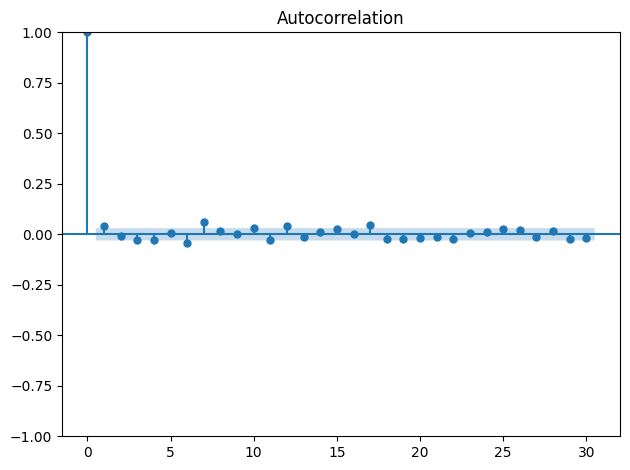

In [47]:
plot_acf(Close_log_diff, lags=30);

plt.tight_layout()

plt.savefig('figures/CH04_F06_peixeiro.png', dpi=300)

In [62]:
df_diff = pd.DataFrame({'Close_diff': Close_diff})
df_diff.index = df.index[1:]

train = df_diff[:int(0.9*len(df_diff))]
test = df_diff[int(0.9*len(df_diff)):]

print(len(train))
print(len(test))

3777
420


In [63]:
df_close_log_diff = pd.DataFrame({'Close_log_diff': Close_log_diff})
df_close_log_diff.index = df.index[1:]

train_log = df_close_log_diff[:int(0.9*len(df_close_log_diff))]
test_log = df_close_log_diff[int(0.9*len(df_close_log_diff)):]
print(len(train_log))
print(len(test_log))

3777
420


In [66]:
test

,Close_diff
Datetime,
2023-02-15 00:00:00+00:00,86.000000
2023-02-16 00:00:00+00:00,20.000000
2023-02-17 00:00:00+00:00,-91.650391
2023-02-20 00:00:00+00:00,-99.599609
2023-02-21 00:00:00+00:00,-17.900391
...,...
2024-10-25 00:00:00+00:00,-218.599609
2024-10-28 00:00:00+00:00,158.349609
2024-10-29 00:00:00+00:00,127.699219


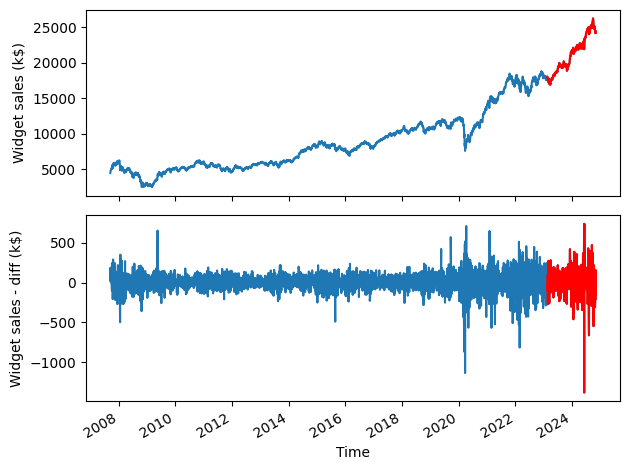

In [69]:
fig, (ax1, ax2) = plt.subplots(nrows=2, ncols=1, sharex=True)

ax1.plot(df['Close'])
ax1.set_xlabel('Time')
ax1.set_ylabel('Widget sales (k$)')
# colour test data differently
ax1.plot(test.index, df['Close'][-420:], label='Test data', color='red')
ax2.plot(df_diff['Close_diff'])
ax2.set_xlabel('Time')
ax2.set_ylabel('Widget sales - diff (k$)')
ax2.plot(test.index, test['Close_diff'], label='Test data', color='red')
fig.autofmt_xdate()
plt.tight_layout()

plt.savefig('figures/CH04_F07_peixeiro.png', dpi=300)

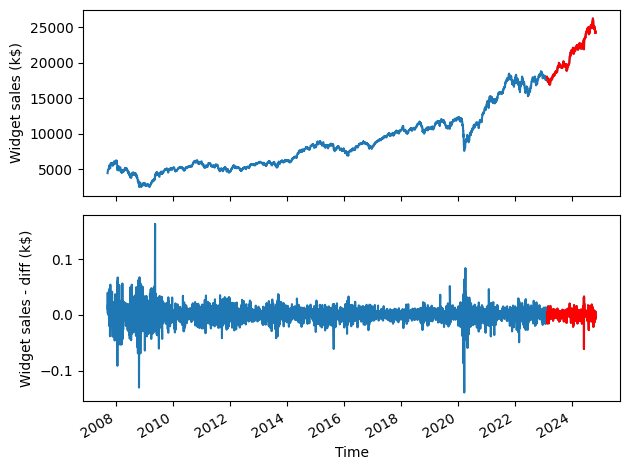

In [71]:
fig, (ax1, ax2) = plt.subplots(nrows=2, ncols=1, sharex=True)

ax1.plot(df['Close'])
ax1.set_xlabel('Time')
ax1.set_ylabel('Widget sales (k$)')
# colour test data differently
ax1.plot(test.index, df['Close'][-420:], label='Test data', color='red')
ax2.plot(df_close_log_diff['Close_log_diff'])
ax2.set_xlabel('Time')
ax2.set_ylabel('Widget sales - diff (k$)')
ax2.plot(test.index, test_log['Close_log_diff'], label='Test data', color='red')
fig.autofmt_xdate()
plt.tight_layout()

plt.savefig('figures/CH04_F07_peixeiro.png', dpi=300)

In [72]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

def rolling_forecast(df: pd.DataFrame, train_len: int, horizon: int, window: int, method: str) -> list:
    
    total_len = train_len + horizon
    
    if method == 'mean':
        pred_mean = []
        
        for i in range(train_len, total_len, window):
            mean = np.mean(df[:i].values)
            pred_mean.extend(mean for _ in range(window))

        return pred_mean

    elif method == 'last':
        pred_last_value = []
        
        for i in range(train_len, total_len, window):
            last_value = df[:i].iloc[-1].values[0]
            pred_last_value.extend(last_value for _ in range(window))
            
        return pred_last_value
    
    elif method == 'MA':
        pred_MA = []
        
        for i in range(train_len, total_len, window):
            model = SARIMAX(df[:i], order=(0,0,2))
            res = model.fit(disp=False)
            predictions = res.get_prediction(0, i + window - 1)
            oos_pred = predictions.predicted_mean.iloc[-window:]
            pred_MA.extend(oos_pred)
            
        return pred_MA

In [73]:
pred_df = test.copy()

TRAIN_LEN = len(train)
HORIZON = len(test)
WINDOW = 2

pred_mean = rolling_forecast(df_diff, TRAIN_LEN, HORIZON, WINDOW, 'mean')
pred_last_value = rolling_forecast(df_diff, TRAIN_LEN, HORIZON, WINDOW, 'last')
pred_MA = rolling_forecast(df_diff, TRAIN_LEN, HORIZON, WINDOW, 'MA')

pred_df['pred_mean'] = pred_mean
pred_df['pred_last_value'] = pred_last_value
pred_df['pred_MA'] = pred_MA

pred_df.head()

,Close_diff,pred_mean,pred_last_value,pred_MA
Datetime,,,,
2023-02-15 00:00:00+00:00,86.000000,3.557109,158.949219,4.276448
2023-02-16 00:00:00+00:00,20.000000,3.557109,158.949219,-0.298946
2023-02-17 00:00:00+00:00,-91.650391,3.583276,20.000000,0.314596
2023-02-20 00:00:00+00:00,-99.599609,3.583276,20.000000,-0.034978
2023-02-21 00:00:00+00:00,-17.900391,3.530799,-99.599609,-2.340086


In [81]:
pred_df_log = test_log.copy()

TRAIN_LEN = len(train_log)
HORIZON = len(test_log)
WINDOW = 2

pred_mean = rolling_forecast(df_close_log_diff, TRAIN_LEN, HORIZON, WINDOW, 'mean')
pred_last_value = rolling_forecast(df_close_log_diff, TRAIN_LEN, HORIZON, WINDOW, 'last')
pred_MA = rolling_forecast(df_close_log_diff, TRAIN_LEN, HORIZON, WINDOW, 'MA')

pred_df_log['pred_mean'] = pred_mean
pred_df_log['pred_last_value'] = pred_last_value
pred_df_log['pred_MA'] = pred_MA

pred_df.head()

,Close_diff,pred_mean,pred_last_value,pred_MA
Datetime,,,,
2023-02-15 00:00:00+00:00,86.000000,3.557109,158.949219,4.276448
2023-02-16 00:00:00+00:00,20.000000,3.557109,158.949219,-0.298946
2023-02-17 00:00:00+00:00,-91.650391,3.583276,20.000000,0.314596
2023-02-20 00:00:00+00:00,-99.599609,3.583276,20.000000,-0.034978
2023-02-21 00:00:00+00:00,-17.900391,3.530799,-99.599609,-2.340086


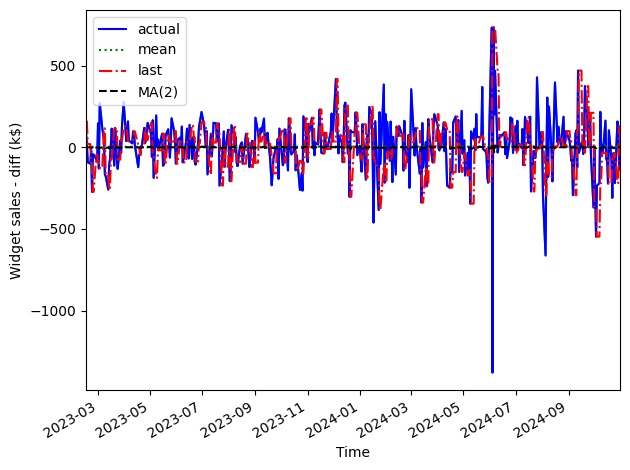

In [82]:
fig, ax = plt.subplots()

ax.plot(df_diff['Close_diff'])
ax.plot(pred_df['Close_diff'], 'b-', label='actual')
ax.plot(pred_df['pred_mean'], 'g:', label='mean')
ax.plot(pred_df['pred_last_value'], 'r-.', label='last')
ax.plot(pred_df['pred_MA'], 'k--', label='MA(2)')

ax.legend(loc=2)

ax.set_xlabel('Time')
ax.set_ylabel('Widget sales - diff (k$)')
ax.set_xlim([test.index[0], test.index[-1]])

# plt.xticks(
#     [439, 468, 498], 
#     ['Apr', 'May', 'Jun'])

fig.autofmt_xdate()
plt.tight_layout()

plt.savefig('figures/CH04_F08_peixeiro.png', dpi=300)

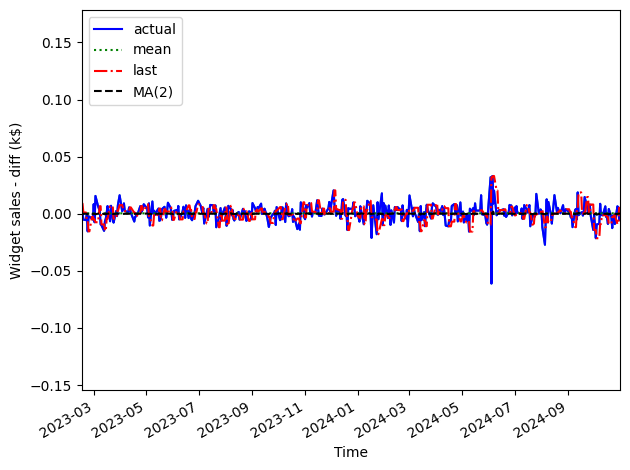

In [85]:
fig, ax = plt.subplots()

ax.plot(df_close_log_diff['Close_log_diff'])
ax.plot(pred_df_log['Close_log_diff'], 'b-', label='actual')
ax.plot(pred_df_log['pred_mean'], 'g:', label='mean')
ax.plot(pred_df_log['pred_last_value'], 'r-.', label='last')
ax.plot(pred_df_log['pred_MA'], 'k--', label='MA(2)')

ax.legend(loc=2)

ax.set_xlabel('Time')
ax.set_ylabel('Widget sales - diff (k$)')
ax.set_xlim([test.index[0], test.index[-1]])

# plt.xticks(
#     [439, 468, 498], 
#     ['Apr', 'May', 'Jun'])

fig.autofmt_xdate()
plt.tight_layout()

plt.savefig('figures/CH04_F08_peixeiro.png', dpi=300)

In [86]:
from sklearn.metrics import mean_squared_error

mse_mean = mean_squared_error(pred_df['Close_diff'], pred_df['pred_mean'])
mse_last = mean_squared_error(pred_df['Close_diff'], pred_df['pred_last_value'])
mse_MA = mean_squared_error(pred_df['Close_diff'], pred_df['pred_MA'])

print(mse_mean, mse_last, mse_MA)

27730.6023589349 48919.99584466843 27938.701578868753


In [129]:
from sklearn.metrics import mean_squared_error

mse_mean = mean_squared_error(pred_df_log['Close_log_diff'], pred_df_log['pred_mean'])
mse_last = mean_squared_error(pred_df_log['Close_log_diff'], pred_df_log['pred_last_value'])
mse_MA = mean_squared_error(pred_df_log['Close_log_diff'], pred_df_log['pred_MA'])
mean_abosulte_percentage_error = np.mean(np.abs((pred_df_log['Close_log_diff'] - pred_df_log['pred_mean']) / pred_df_log['Close_log_diff'])) * 100
print(mse_mean, mse_last, mse_MA)
print(mean_abosulte_percentage_error)

5.790347274067985e-05 0.00010178902554252478 5.8558645292283716e-05
118.64659269156668


In [128]:
# any zero values in the test data?

pred_df_log['Close_log_diff'][pred_df_log['Close_log_diff']== 0]

# drop the zero values
pred_df_log = pred_df_log[pred_df_log['Close_log_diff'] != 0]



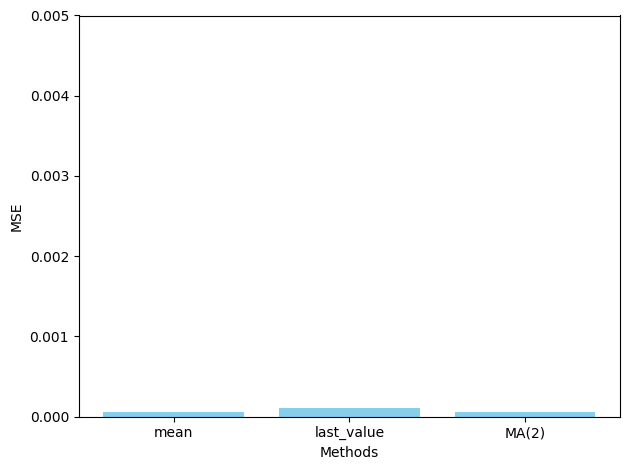

In [93]:
fig, ax = plt.subplots()

x = ['mean', 'last_value', 'MA(2)']
y = [mse_mean, mse_last, mse_MA]

ax.bar(x, y, color='skyblue')
ax.set_xlabel('Methods')
ax.set_ylabel('MSE')
ax.set_ylim(0, 0.005)

# for index, value in enumerate(y):
#     plt.text(x=index, y=value+0.25, s=str(round(value, 2)), ha='center')

plt.tight_layout()

plt.savefig('figures/CH04_F09_peixeiro.png', dpi=300)

In [99]:
df.info()
pred_df.info()

df.iloc[TRAIN_LEN:TRAIN_LEN+HORIZON].head()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 4198 entries, 2007-09-17 00:00:00+00:00 to 2024-10-31 00:00:00+00:00
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Close       4198 non-null   float64
 1   pred_Close  0 non-null      object 
dtypes: float64(1), object(1)
memory usage: 98.4+ KB
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 420 entries, 2023-02-15 00:00:00+00:00 to 2024-10-31 00:00:00+00:00
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Close_diff       420 non-null    float64
 1   pred_mean        420 non-null    float64
 2   pred_last_value  420 non-null    float64
 3   pred_MA          420 non-null    float64
dtypes: float64(4)
memory usage: 16.4 KB


,Close,pred_Close
Datetime,,
2023-02-14 00:00:00+00:00,17929.849609,NaN
2023-02-15 00:00:00+00:00,18015.849609,NaN
2023-02-16 00:00:00+00:00,18035.849609,NaN
2023-02-17 00:00:00+00:00,17944.199219,NaN
2023-02-20 00:00:00+00:00,17844.599609,NaN


In [103]:
4198 - 420
TRAIN_LEN

3777

In [104]:
df['pred_Close'] = pd.Series()
df['pred_Close'][TRAIN_LEN+1:] = df['Close'].iloc[TRAIN_LEN+1] + pred_df['pred_MA'].cumsum()

In [107]:
df['pred_Close_log'] = pd.Series()
df['pred_Close_log'][TRAIN_LEN+1:] = df['Close'].iloc[TRAIN_LEN+1] + np.exp(pred_df_log['pred_MA']).cumsum()

In [113]:
df.tail()

,Close,pred_Close,pred_Close_log
Datetime,,,
2024-10-25 00:00:00+00:00,24180.800781,18061.478819,18431.848108
2024-10-28 00:00:00+00:00,24339.150391,18060.600527,18432.847772
2024-10-29 00:00:00+00:00,24466.849609,18056.678156,18433.847843
2024-10-30 00:00:00+00:00,24340.849609,18059.611571,18434.847978
2024-10-31 00:00:00+00:00,24205.349609,18061.897837,18435.847939


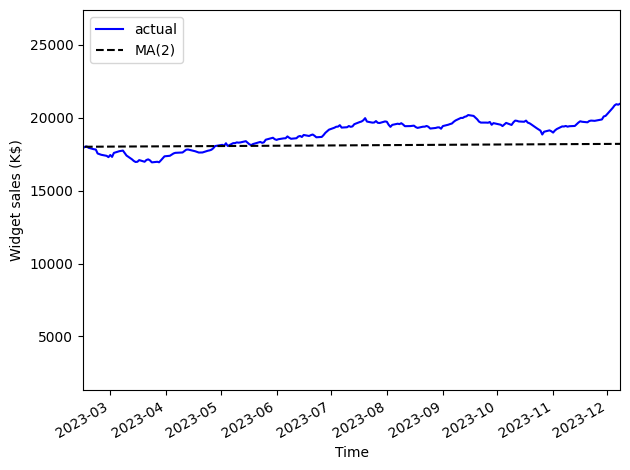

In [118]:
fig, ax = plt.subplots()

ax.plot(df['Close'], 'b-', label='actual')
ax.plot(df['pred_Close_log'], 'k--', label='MA(2)')

ax.legend(loc=2)

ax.set_xlabel('Time')
ax.set_ylabel('Widget sales (K$)')

# ax.axvspan(450, 500, color='#808080', alpha=0.2)

ax.set_xlim(df.index[TRAIN_LEN], df.index[TRAIN_LEN+200])

# plt.xticks(
#     [409, 439, 468, 498], 
#     ['Mar', 'Apr', 'May', 'Jun'])

fig.autofmt_xdate()
plt.tight_layout()

plt.savefig('figures/CH04_F11_peixeiro.png', dpi=300)

In [ ]:
from sklearn.metrics import mean_absolute_error

mae_MA_undiff = mean_absolute_error(df['Close'].iloc[450:], df['pred_Close'].iloc[450:])

print(mae_MA_undiff)

2.324470924412907
